<a href="https://colab.research.google.com/github/Kondasagar/hotel-booking/blob/main/KondaVidyasagar_Hotel_Booking_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# From the above given description, we can understand the situation. And they gave data set in csv format. By analysing the data we can get answers for the questions which were asked in the desciption.
for that we need to do few things
1. load data set by using pandas
2. get to know the features and their distribution
3. clean the data
4. find the relationship among features by using plots

 

In [1]:
# importing libraries which are required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data loading 

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_projects/hotel_bookings_eda/Copy of Hotel Bookings.csv')
# features in the given hotel bookings dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
# the first 10 rows in hotel bookings df is:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [5]:
print(f"the number of columns in our dataframe is {df.shape[1]}.")
print(f"the number of rows in our dataframe is {df.shape[0]}.")

the number of columns in our dataframe is 32.
the number of rows in our dataframe is 119390.


# NOTE: 32 features are there in hotel bookings dataset

To understand the data, we should know the every unique category in variable features. for that we can use .column() on every column in dataframe and can get them.


In [6]:
# by using  .info() we can get a good view about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# checking for null values
df.isna().sum().sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

from above information, we can tell almost every feature having non null values except few features named 'company', 'agent', 'country', 'children'.


In [8]:
# getting first five rows of dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# getting unique categories in each feature
for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print("-*-"*30)

hotel : ['Resort Hotel' 'City Hotel']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
is_canceled : [0 1]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
lead_time : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 3

# Understanding the Data

the features in tha data frame and theier categories are




> 1.hotel : two types of hotels are there, ['Resort Hotel' 'City Hotel'].


> 2.is_canceled : 0 represents not cancelled and 1 represents cancelled [0 1]



>3.lead time: The Booking Lead Time is the number of days between the time     a guest books their room and the time they are scheduled to arrive at the hotel.


> 4.arrival_date_year : [2015 2016 2017]


> 5.arrival_date_month :
  month of arrival --->
  ['July' 'August' 'September' 'October' 'November' 'December' 'January'
  'February' 'March' 'April' 'May' 'June']



>6.arrival_date_week_number: week number, it is ranging from 1 to 53.


>7.arrival_date_day_of_month : it is ranging from 1 to 31.

8. stays_in_weekend_nights : it is ranging from 0 to 14.

9. stays_in_week_nights : it is ranging from 0 to 41.

10. adults : number of adults

11. children : number of children, [ 0.  1.  2. 10.  3. nan].

12. babies : number of babies, [ 0  1  2 10  9].

13. meal : meal type in hoels, ['BB' 'FB' 'HB' 'SC' 'Undefined'].

    . BB means Bead and Breakfast

    . SC means self-catering (no meals are included)

HB means half board, in which breakfast and dinner are included. FB means full board, in which breakfast, lunch and dinner are included. AI means all-inclusive, in which all meals and all drinks are included

14. country : the respective hotel present in which country

15. market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

16. distribution_channel : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

17. is_repeated_guest : [0 1]

18. previous_cancellations : [ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]

19. previous_bookings_not_canceled : 

20. reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

21. assigned_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']

22. booking_changes : [ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]

23. deposit_type : ['No Deposit' 'Refundable' 'Non Refund']

24. agent : 

25. company :

26. days_in_waiting_list :

27. customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']

28. adr : [  0.    75.    98.   ... 266.75 209.25 157.71]

29. required_car_parking_spaces : [0 1 2 8 3]

30. total_of_special_requests : [0 1 3 2 4 5]

31. reservation_status : ['Check-Out' 'Canceled' 'No-Show']

32. reservation_status_date :





















# Data cleaning and Manipulation

Before doing this we should copy our original data frame to a new dataframe.
we seen nan values in some columns, we should take appropriate decision about those entries (either remove or replace them with appropriate value).

In [10]:
df_new=df.copy()

In [11]:
# replace null values in agent with 0
df_new['agent'].fillna(0,inplace=True)

# replacing the null values in company with zero
df_new['company'].fillna(0,inplace=True)

# replacing the null values in country with "others"
df_new['country'].fillna("others",inplace=True)

# replacing the null values in children with zero
df_new['children'].fillna(0,inplace=True)

In [12]:
df_new.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Now, there is no null value present in oue new data set 

In [13]:
# sometimes there will be duplicate rows in data
df_new.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [14]:
# dropping duplicate values
df_new=df_new[df_new.duplicated()==False]

# counting duplicate values in manipulated dataframw
df_new.duplicated().value_counts()

False    87396
dtype: int64

In [15]:
df_new.shape

(87396, 32)

In [16]:
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
df_new['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

# questions to be answered:

when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? 

In [21]:
# creating new columns for answering optimal length stay
df_new['total_stays']=df_new['stays_in_weekend_nights']+df_new['stays_in_week_nights']

# babies are not accounted for total people stay in a hotel room
df_new['total_people']=df_new['adults']+df_new['children']


In [22]:
df_new.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,total_stays
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2.0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3.0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2.0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2.0,7
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,Transient,151.20,0,2,Check-Out,2017-09-07,9,2.0,9


# EDA Procedure:
we can use pie charts and other plots to get visualization information from our data.
By looking at those graphs we can answer questions asked earlier and also we can take good decisions as when is the good time to book a hotel.

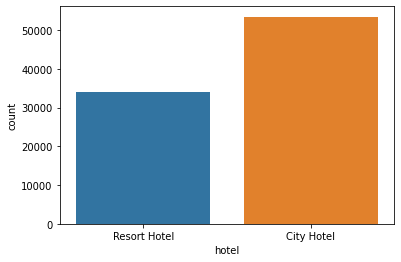

In [20]:
# Plotting the count plot for above dataframe regarding hotel type
sns.countplot(x='hotel',data=df_new)


**From above count plot, we can say most people preferring the city Hotel over Resort Hotel**

# 1. when the best time of year to book a hotel room is?

let us try to answer the question by visualising the relationship between the number of bookings and time of booking.



In [38]:
# create a group using groupby
# group = df_new.groupby(["hotel","arrival_date_month"])
  
# count the observations
# group

In [37]:
# group["hotel"].head()

Text(0.5, 1.0, 'arrivals to hotel')

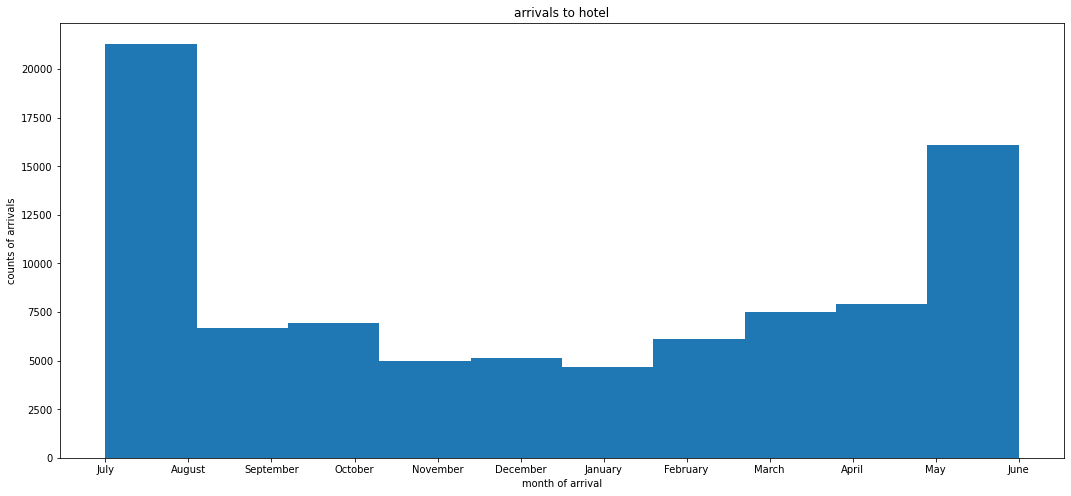

In [50]:
# distribution of arrivals in hotel by using histogram
plt.figure(figsize=(18, 8))
plt.hist(df_new['arrival_date_month'])

plt.xlabel('month of arrival')
plt.ylabel('counts of arrivals')
plt.title("arrivals to hotel")


# # Creating histogram
# fig, ax = plt.subplots(1, 1)
# ax.hist(df_new['arrival_date_month'])
  
# # Set title
# ax.set_title("arrivals to hotel")
  
# # adding labels
# ax.set_xlabel('month of the year')
# ax.set_ylabel('counts of arrivals')


**By observing the above histogram, we get to know that the number of arrivals in the months of November, December, January are less. So these months will be the best time for booking a hotel room.**
**bold text**


# 2. The optimal length of stay in order to get the best daily rate?